# Part I: Import and Select Data

In [ ]:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-Eddie-PS-2/main/data/Queried_Data/co2_mm_mlo.csv")
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


# Part II

In [ ]:
df.dtypes

year                int64
month               int64
decimal date      float64
average           float64
deseasonalized    float64
ndays               int64
sdev              float64
unc               float64
dtype: object

## Shift Y to Get Past Values

In [ ]:
# generate a new variable as the previous 1 observable of your Y variable for regression
df['average_past'] =df['average'].shift(1)
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc,average_past
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99,NaN
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,315.70
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99,317.45
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99,317.51
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99,317.24


In [ ]:
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc,average_past
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99,NaN
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,315.70
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99,317.45
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99,317.51
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99,317.24


## Train & Test Split

In [ ]:

from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [ ]:


# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [ ]:


for train_idx, test_idx in tss.split(df):
    print("TRAIN:", train_idx, "TEST:", test_idx)
     

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [ ]:

train_idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:

test_idx

array([520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532,
       533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545,
       546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558,
       559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571,
       572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584,
       585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597,
       598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610,
       611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623,
       624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636,
       637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649,
       650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662,
       663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675,
       676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688,
       689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 70

In [ ]:

train_df = df.filter(items=train_idx, axis=0)
test_df =  df.filter(items=test_idx, axis=0)
     

In [ ]:


train_df.head()
     

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc,average_past
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99,NaN
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,315.70
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99,317.45
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99,317.51
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99,317.24


In [ ]:

test_df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc,average_past
520,2001,7,2001.5417,371.68,371.08,25,0.62,0.24,373.40
521,2001,8,2001.6250,369.78,371.39,27,0.60,0.22,371.68
522,2001,9,2001.7083,368.34,371.61,28,0.49,0.18,369.78
523,2001,10,2001.7917,368.61,371.85,31,0.33,0.11,368.34
524,2001,11,2001.8750,369.94,371.92,24,0.24,0.09,368.61


# Part III

In [ ]:


cols_R = ['average','average_past']

In [ ]:

df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
     

In [ ]:


df_R_train.head()

,average,average_past
0,315.70,NaN
1,317.45,315.70
2,317.51,317.45
3,317.24,317.51
4,315.86,317.24


In [ ]:
df_R_train.to_csv('Regression_Train.csv')

In [ ]:

df_R_test.head()

,average,average_past
520,371.68,373.40
521,369.78,371.68
522,368.34,369.78
523,368.61,368.34
524,369.94,368.61


In [ ]:

df_R_test.to_csv('Regression_Test.csv')

# Part IV

In [ ]:
C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-Eddie-PS-2/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-Eddie-PS-2/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

In [ ]:

C_train.isna().sum()

average         0
average_past    1
dtype: int64

In [ ]:
#dropnan inputs


C_train =C_train.dropna()

In [ ]:

C_train.head()

,average,average_past
1,317.45,315.70
2,317.51,317.45
3,317.24,317.51
4,315.86,317.24
5,314.93,315.86


In [ ]:

C_test.isna().sum()

average         0
average_past    0
dtype: int64

# Part V

In [ ]:


from sklearn import linear_model

In [ ]:


C_train.head()

,average,average_past
1,317.45,315.70
2,317.51,317.45
3,317.24,317.51
4,315.86,317.24
5,314.93,315.86


In [ ]:

X_train = pd.DataFrame(C_train['average_past'])
y_train = pd.DataFrame(C_train['average'])

In [ ]:

C_test.head()

,average,average_past
520,371.68,373.40
521,369.78,371.68
522,368.34,369.78
523,368.61,368.34
524,369.94,368.61


In [ ]:


X_test = pd.DataFrame(C_test['average_past'])
y_test = pd.DataFrame(C_test['average'])
     

## Linear Regression

In [ ]:
from sklearn import linear_model

In [ ]:

from sklearn.metrics import r2_score

In [ ]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [ ]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.9915539790301517


In [ ]:

y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,373.494196
1,371.775054
2,369.876001
3,368.436720
4,368.706585
...,...
254,417.262351
255,416.022969
256,415.853054
257,417.582191


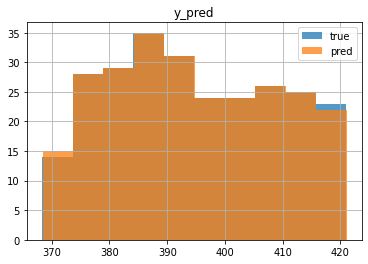

In [ ]:

fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

## Random Forest Regression

In [ ]:


from sklearn.ensemble import RandomForestRegressor

In [ ]:

mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-68-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [ ]:
# calculate R2
from sklearn.metrics import r2_score
     

In [ ]:

r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -2.2222807762875654


In [ ]:

y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,373.7774
1,372.1033
2,370.8140
3,368.8154
4,369.6841
...,...
254,373.5128
255,373.5128
256,373.5128
257,373.5128


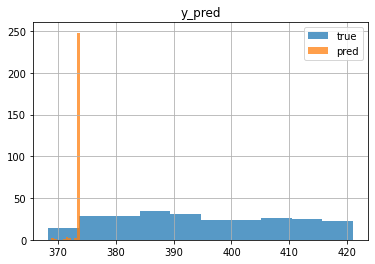

In [ ]:

fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()